In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow_hub import KerasLayer
from sklearn.preprocessing import LabelEncoder

In [2]:
preprocessor_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encorder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [94]:
df = pd.read_csv('../legal_text_classification.csv')

In [95]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [96]:
df.tail()

,case_id,case_outcome,case_title,case_text
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...
24984,Case25207,distinguished,Yandil Holdings Pty Ltd v Insurance Co of Nort...,"In my view, it is clear that the Court may do ..."


In [97]:
df.shape

(24985, 4)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


In [99]:
df.duplicated().sum()

0

In [100]:
df.isnull().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
dtype: int64

In [101]:
df.dropna(inplace= True, axis= 0)

In [102]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [103]:
df.isnull().sum()

case_id         0
case_outcome    0
case_title      0
case_text       0
dtype: int64

In [104]:
X = df['case_text'].values.flatten()
y = df['case_outcome']

In [105]:
X[0]

'Ordinarily that discretion will be exercised so that costs follow the event and are awarded on a party and party basis. A departure from normal practice to award indemnity costs requires some special or unusual feature in the case: Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Ltd (No 2) [2002] FCA 224 ; (2002) 190 ALR 121 at [11] (Weinberg J) citing Colgate Palmolive Co v Cussons Pty Ltd (1993) 46 FCR 225 at 233 (Sheppard J).'

In [106]:
y[0]

'cited'

In [107]:
labels = y.value_counts().index
y.value_counts(normalize= True) * 100

cited            48.812931
referred to      17.586360
applied           9.827079
followed          9.077351
considered        6.848321
discussed         4.103350
distinguished     2.430570
related           0.451449
approved          0.435326
affirmed          0.427264
Name: case_outcome, dtype: float64

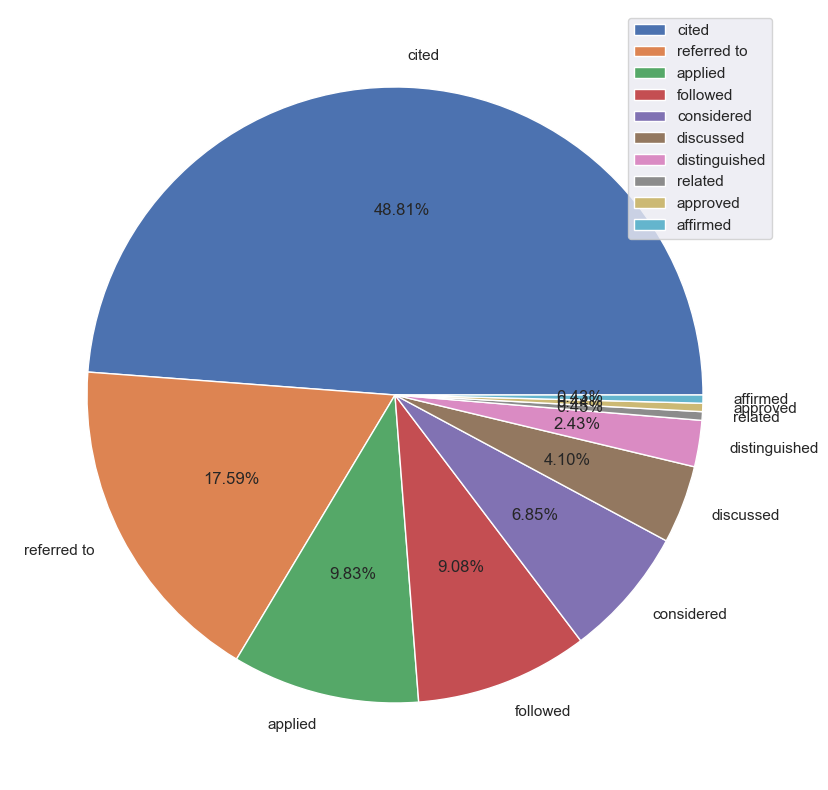

In [108]:
sns.set()
plt.figure(figsize = (10, 10))
plt.pie(x = y.value_counts(), labels= labels, autopct= '%1.2f%%')
plt.legend(y.value_counts().index)
plt.show()

In [109]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([3, 3, 3, ..., 3, 6, 6])

In [110]:
labels = sorted(list(labels))

for i in range(len(labels)):
    
    print(f"{labels[i]} encorded as a : {i}")

affirmed encorded as a : 0
applied encorded as a : 1
approved encorded as a : 2
cited encorded as a : 3
considered encorded as a : 4
discussed encorded as a : 5
distinguished encorded as a : 6
followed encorded as a : 7
referred to encorded as a : 8
related encorded as a : 9


In [111]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
wl = WordNetLemmatizer()
corpus = []

for i in range(len(list(X))):
    text = re.sub('[^a-zA-Z0-9]', ' ', X[i])
    text = text.lower()
    text = text.split()
    text = [wl.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)
    
    print(f"status = {i+ 1}/ {len(list(X))}")

status = 1/ 24809
status = 2/ 24809
status = 3/ 24809
status = 4/ 24809
status = 5/ 24809
status = 6/ 24809
status = 7/ 24809
status = 8/ 24809
status = 9/ 24809
status = 10/ 24809
status = 11/ 24809
status = 12/ 24809
status = 13/ 24809
status = 14/ 24809
status = 15/ 24809
status = 16/ 24809
status = 17/ 24809
status = 18/ 24809
status = 19/ 24809
status = 20/ 24809
status = 21/ 24809
status = 22/ 24809
status = 23/ 24809
status = 24/ 24809
status = 25/ 24809
status = 26/ 24809
status = 27/ 24809
status = 28/ 24809
status = 29/ 24809
status = 30/ 24809
status = 31/ 24809
status = 32/ 24809
status = 33/ 24809
status = 34/ 24809
status = 35/ 24809
status = 36/ 24809
status = 37/ 24809
status = 38/ 24809
status = 39/ 24809
status = 40/ 24809
status = 41/ 24809
status = 42/ 24809
status = 43/ 24809
status = 44/ 24809
status = 45/ 24809
status = 46/ 24809
status = 47/ 24809
status = 48/ 24809
status = 49/ 24809
status = 50/ 24809
status = 51/ 24809
status = 52/ 24809
status = 53/ 24809
st

status = 423/ 24809
status = 424/ 24809
status = 425/ 24809
status = 426/ 24809
status = 427/ 24809
status = 428/ 24809
status = 429/ 24809
status = 430/ 24809
status = 431/ 24809
status = 432/ 24809
status = 433/ 24809
status = 434/ 24809
status = 435/ 24809
status = 436/ 24809
status = 437/ 24809
status = 438/ 24809
status = 439/ 24809
status = 440/ 24809
status = 441/ 24809
status = 442/ 24809
status = 443/ 24809
status = 444/ 24809
status = 445/ 24809
status = 446/ 24809
status = 447/ 24809
status = 448/ 24809
status = 449/ 24809
status = 450/ 24809
status = 451/ 24809
status = 452/ 24809
status = 453/ 24809
status = 454/ 24809
status = 455/ 24809
status = 456/ 24809
status = 457/ 24809
status = 458/ 24809
status = 459/ 24809
status = 460/ 24809
status = 461/ 24809
status = 462/ 24809
status = 463/ 24809
status = 464/ 24809
status = 465/ 24809
status = 466/ 24809
status = 467/ 24809
status = 468/ 24809
status = 469/ 24809
status = 470/ 24809
status = 471/ 24809
status = 472/ 24809


status = 837/ 24809
status = 838/ 24809
status = 839/ 24809
status = 840/ 24809
status = 841/ 24809
status = 842/ 24809
status = 843/ 24809
status = 844/ 24809
status = 845/ 24809
status = 846/ 24809
status = 847/ 24809
status = 848/ 24809
status = 849/ 24809
status = 850/ 24809
status = 851/ 24809
status = 852/ 24809
status = 853/ 24809
status = 854/ 24809
status = 855/ 24809
status = 856/ 24809
status = 857/ 24809
status = 858/ 24809
status = 859/ 24809
status = 860/ 24809
status = 861/ 24809
status = 862/ 24809
status = 863/ 24809
status = 864/ 24809
status = 865/ 24809
status = 866/ 24809
status = 867/ 24809
status = 868/ 24809
status = 869/ 24809
status = 870/ 24809
status = 871/ 24809
status = 872/ 24809
status = 873/ 24809
status = 874/ 24809
status = 875/ 24809
status = 876/ 24809
status = 877/ 24809
status = 878/ 24809
status = 879/ 24809
status = 880/ 24809
status = 881/ 24809
status = 882/ 24809
status = 883/ 24809
status = 884/ 24809
status = 885/ 24809
status = 886/ 24809


status = 1235/ 24809
status = 1236/ 24809
status = 1237/ 24809
status = 1238/ 24809
status = 1239/ 24809
status = 1240/ 24809
status = 1241/ 24809
status = 1242/ 24809
status = 1243/ 24809
status = 1244/ 24809
status = 1245/ 24809
status = 1246/ 24809
status = 1247/ 24809
status = 1248/ 24809
status = 1249/ 24809
status = 1250/ 24809
status = 1251/ 24809
status = 1252/ 24809
status = 1253/ 24809
status = 1254/ 24809
status = 1255/ 24809
status = 1256/ 24809
status = 1257/ 24809
status = 1258/ 24809
status = 1259/ 24809
status = 1260/ 24809
status = 1261/ 24809
status = 1262/ 24809
status = 1263/ 24809
status = 1264/ 24809
status = 1265/ 24809
status = 1266/ 24809
status = 1267/ 24809
status = 1268/ 24809
status = 1269/ 24809
status = 1270/ 24809
status = 1271/ 24809
status = 1272/ 24809
status = 1273/ 24809
status = 1274/ 24809
status = 1275/ 24809
status = 1276/ 24809
status = 1277/ 24809
status = 1278/ 24809
status = 1279/ 24809
status = 1280/ 24809
status = 1281/ 24809
status = 1282

In [77]:
corpus

nan